In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
t = np.linspace(0,10**6,10**6)
w = 2.6617e-6
G = 6.67e-11
mT = 5.9736e24
rT = 6.3781e6
mL = 0.07349e24
rL = 1.7374e6
d = 3.844e8

In [3]:
def System(y,t,G,mT,mL,d,w):
    
    r,phi,pr,pphi = y

    delta = G*mT/d**3
    mu = mL/mT
    rp = np.sqrt(1+r**2-2*r*np.cos(phi-w*t))
    
    drdt = pr
    dphidt = pphi/r**2 
    dprdt = (pphi**2/r**3) - delta*((1/r**2) + (mu/rp**3)*(r-np.cos(phi-w*t)))
    dpphidt = -(delta*mu*r/rp**3)*np.sin(phi-w*t)
    
    return np.array([drdt,dphidt,dprdt,dpphidt])

In [4]:
def RK4(f,R0,t,G,mT,mL,d,w):  
    h = t[1] - t[0]
    
    r = np.zeros_like(t)
    phi = np.zeros_like(t)
    
    pr = np.zeros_like(t)
    pphi = np.zeros_like(t)
    
    r[0] = R0[0]
    phi[0] = R0[1]
    pr[0] = R0[2]
    pphi[0] = R0[3]

    for i in tqdm(range(1,len(t))):
        
        R = np.array([r[i-1],phi[i-1],pr[i-1],pphi[i-1]])
        
        K1 = f(R,t[i-1],G,mT,mL,d,w)
        
        R = np.array([r[i-1]+0.5*h*K1[0],phi[i-1]+0.5*h*K1[1],pr[i-1]+0.5*h*K1[2],pphi[i-1]+0.5*h*K1[3]])
        
        K2 = f(R,t[i-1]+0.5*h,G,mT,mL,d,w)
        
        R = np.array([r[i-1]+0.5*h*K2[0],phi[i-1]+0.5*h*K2[1],pr[i-1]+0.5*h*K2[2],pphi[i-1]+0.5*h*K2[3]])
        
        K3 = f(R,t[i-1]+0.5*h,G,mT,mL,d,w)
        
        R = np.array([r[i-1]+h*K3[0],phi[i-1]+h*K3[1],pr[i-1]+h*K3[2],pphi[i-1]+h*K3[3]])
        
        K4 = f(R,t[i-1]+h,G,mT,mL,d,w)
        
        r[i] = r[i-1] + h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])/6
        phi[i] = phi[i-1] + h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])/6
        
        pr[i] = pr[i-1] + h*(K1[2]+2*K2[2]+2*K3[2]+K4[2])/6
        pphi[i] = pphi[i-1] + h*(K1[3]+2*K2[3]+2*K3[3]+K4[3])/6
        
    return r,phi,pr,pphi

In [5]:
v_0 = 11.2e3/d
phi_0 = 340*np.pi/180
theta_0 =  10*np.pi/180
r0 = rT/d

y0 = [r0, phi_0, v_0*np.cos(theta_0-phi_0), v_0*r0*np.sin(theta_0-phi_0)]

In [6]:
sol = integrate.odeint(System, y0, t, args=(G,mT,mL,d,w))
r = sol[:,0]
phi = sol[:,1]
pr = sol[:,2]
pphi = sol[:,3]

In [7]:
solRK = RK4(System,y0,t,G,mT,mL,d,w)

100%|███████████████████████████████████████████████████████████████████████| 999999/999999 [01:20<00:00, 12359.00it/s]


In [8]:
r_ = solRK[0]
phi_ = solRK[1]
pr_ = solRK[2]
pphi_ = solRK[3]

<IPython.core.display.Javascript object>


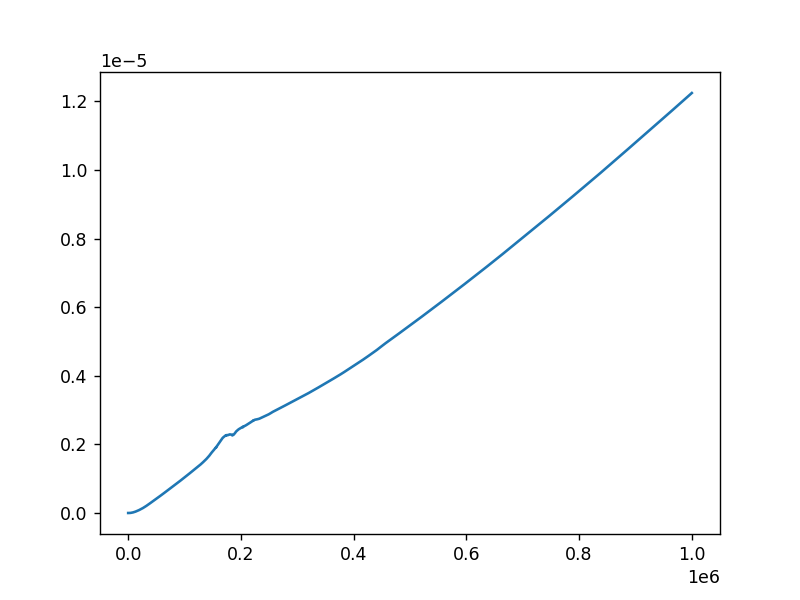

In [9]:
plt.plot(t,np.abs(r-r_))

In [10]:
x_l = d*np.cos(w*t)
y_l = d*np.sin(w*t)

x_t = r_*np.cos(phi_)*d
y_t = r_*np.sin(phi_)*d

<IPython.core.display.Javascript object>


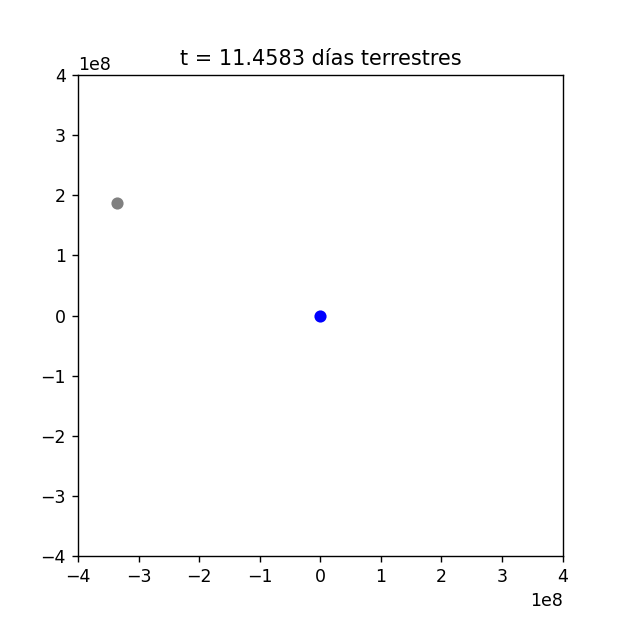

In [12]:
scale = 10000
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

t_ = t[::scale]*(1/86400)

def init():
    
    ax.clear()
    ax.set_xlim(-4e8,4e8)
    ax.set_ylim(-4e8,4e8)
    
def Update(i):
    init()
    ax.scatter(0,0,color="b")
    ax.scatter(x_l[::scale][i],y_l[::scale][i],color='gray' )
    ax.set_title("t = {:.4f} días terrestres".format(t_[i]))
    ax.scatter(x_t[::scale][i],y_t[::scale][i],marker=".",color="y")
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t[::scale]),init_func=init)